In [35]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

In [39]:
def knn_comparision(data, neighbors):
    
    X = data[:, :2]
    y = data[:,2] 
    
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X,y)
    
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,0.02), np.arange(y_min,y_max,0.02))
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = z.reshape(xx.shape)
    
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
   
    # scatter plot of with given points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(neighbors))
    

    plt.show()

In [40]:
data = np.genfromtxt('6.overlap.csv', delimiter=',')

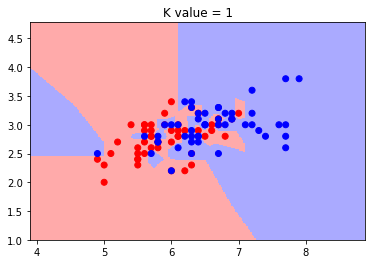

In [41]:
knn_comparision(data, 1)

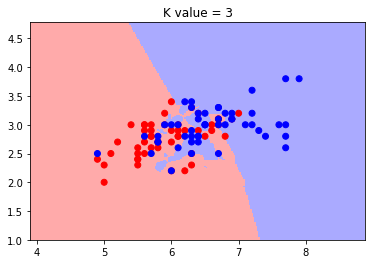

In [42]:
knn_comparision(data, 3)

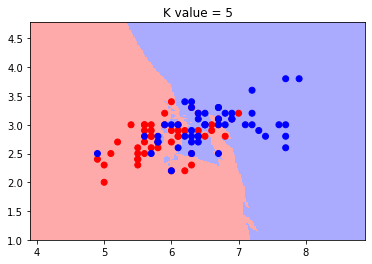

In [43]:
knn_comparision(data, 5)

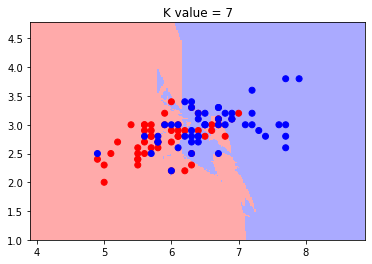

In [44]:
knn_comparision(data, 7)

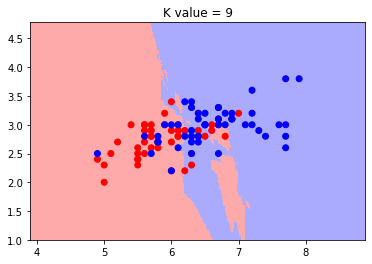

In [45]:
knn_comparision(data, 9)

### IRIS dataset


In [46]:
iris = pd.read_csv('Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
X = iris.drop('Species', axis = 1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
for i in [1,3,5,7,9,15,25]:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    print('Accuracy is: ',accuracy_score(y_test, y_pred, normalize=True)*float(100))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print('-'*50)
    

Accuracy is:  100.0
[[15  0  0]
 [ 0 13  0]
 [ 0  0 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
Accuracy is:  100.0
[[15  0  0]
 [ 0 13  0]
 [ 0  0 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

-------------------------------

### K-Fold cross validation

In [60]:
my_list = list(range(1,50))

In [61]:
neighbors = list(filter(lambda x:x%2==0, my_list))

In [62]:
cv_scores = []


In [64]:
from sklearn.model_selection import cross_val_score
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    
    cv_scores.append(scores.mean())
    
   
    

In [66]:
#Calculating the error
mse = [1-x for x in cv_scores]

In [67]:
best_k = neighbors[mse.index(min(mse))]

In [69]:
print('best k is',best_k)

best k is 2


Text(0, 0.5, 'Error')

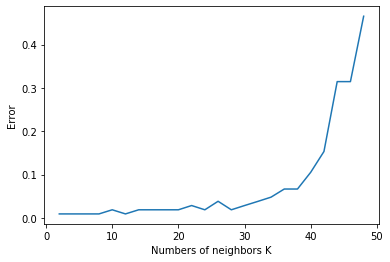

In [71]:
plt.plot(neighbors, mse)
plt.xlabel('Numbers of neighbors K')
plt.ylabel('Error')

In [73]:
mse

[0.00925925925925919,
 0.00925925925925919,
 0.00925925925925919,
 0.00925925925925919,
 0.01878306878306868,
 0.00925925925925919,
 0.01878306878306868,
 0.01878306878306868,
 0.01878306878306868,
 0.01878306878306868,
 0.028586990351696318,
 0.01878306878306868,
 0.038390911920323734,
 0.01878306878306868,
 0.028586990351696318,
 0.03811079987550581,
 0.047914721444133335,
 0.06668222844693439,
 0.06668222844693439,
 0.10535325241207605,
 0.1532835356364769,
 0.3144568938686586,
 0.3144568938686586,
 0.46526610644257704]